<a href="https://colab.research.google.com/github/suntimo/Pytorch-Introduction/blob/main/Introduction_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
a2 = a.reshape(2, 5)
a2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [5]:
a.view(10,1)

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [6]:
import numpy as np

In [19]:
n_array = np.random.randint(1,8)
n_array

3

In [21]:
n2 = np.random.rand(3, 5)
n2

array([[0.60924824, 0.74158181, 0.56115641, 0.07778696, 0.71214292],
       [0.52382415, 0.94025377, 0.42831673, 0.86991993, 0.80282287],
       [0.15835024, 0.23020785, 0.89325565, 0.71661982, 0.51833274]])

In [23]:
torch.tensor(n2).dtype

torch.float64

In [24]:
tensor1 = torch.randn(3, 4)
tensor1

tensor([[ 0.5661, -0.2034, -0.4940, -0.3058],
        [-1.2486,  0.7422,  1.8570, -1.0924],
        [-0.2445, -1.3657,  1.2593, -0.5827]])

In [26]:
tensor1.dtype, n2.dtype

(torch.float32, dtype('float64'))

In [27]:
torch.randn(2, 3, 4)

tensor([[[-0.2159,  0.9904,  0.8749,  0.6735],
         [-0.4039, -0.5699,  1.2156, -0.2627],
         [-1.7597, -1.3626,  0.8465,  0.8491]],

        [[ 0.1982, -1.0708,  0.3784, -0.6439],
         [-0.4579, -0.8619,  1.0241,  1.0670],
         [ 1.3611, -0.4883,  1.2782,  0.6148]]])

In [28]:
tensor2 = tensor1.new_tensor
tensor2

<function Tensor.new_tensor>

In [33]:
tensor3 = torch.ones(2,)

In [37]:
data = torch.tensor([[0, 1], [2, 3]])
data.size()

torch.Size([2, 2])

In [38]:
data = [[0, 1], [2, 3]]

In [41]:
tensor4 = tensor3.new_tensor(data)

In [42]:
tensor4.view(4, 1)

tensor([[0.],
        [1.],
        [2.],
        [3.]])

In [43]:
tensor4.view(1, -1)

tensor([[0., 1., 2., 3.]])

In [47]:
tensor4.reshape(-1, 1)

tensor([[0.],
        [1.],
        [2.],
        [3.]])

In [48]:
tensor5 = torch.arange(10)

In [49]:
tensor6 = tensor5.reshape(5, 2)
tensor6

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [50]:
tensor6[:, -1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

## Addition of tensors

In [51]:
tensor_a = torch.tensor([1, 2, 3, 4, 5])
tensor_b = torch.tensor([6, 7, 8, 9, 10])

In [52]:
tensor_a+tensor_b

tensor([ 7,  9, 11, 13, 15])

In [54]:
# Addition
torch.add(tensor_a , tensor_b)

tensor([ 7,  9, 11, 13, 15])

In [55]:
# Subtraction
torch.sub(tensor_a, tensor_b)

tensor([-5, -5, -5, -5, -5])

In [56]:
torch.mul(tensor_a, tensor_b)

tensor([ 6, 14, 24, 36, 50])

In [63]:
# Matrix multiplication
tensor_a@tensor_b

tensor(130)

In [64]:
# Matrix multiplication
torch.matmul(tensor_a, tensor_b)

tensor(130)

In [65]:
tensor_b/ tensor_a

tensor([6.0000, 3.5000, 2.6667, 2.2500, 2.0000])

In [67]:
# Divsiison
torch.div(tensor_a, tensor_b)

tensor([0.1667, 0.2857, 0.3750, 0.4444, 0.5000])

In [68]:
tensor_b%tensor_a

tensor([0, 1, 2, 1, 0])

In [69]:
# Remainder
torch.remainder(tensor_a, tensor_b)

tensor([1, 2, 3, 4, 5])

In [70]:
# Exponential / power
torch.pow(tensor_a, tensor_b)

tensor([      1,     128,    6561,  262144, 9765625])

In [72]:
# Reassignment

In [73]:
tensor_a = tensor_a + tensor_b
tensor_a

tensor([ 7,  9, 11, 13, 15])

In [74]:
tensor_a.sub_(tensor_b)

tensor([1, 2, 3, 4, 5])

In [75]:
tensor_b.add_(tensor_a)

tensor([ 7,  9, 11, 13, 15])

In [76]:
tensor_b

tensor([ 7,  9, 11, 13, 15])

# Simple torch neural network
## Classification of Iris datasets

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Creating a Model Class that inherits nn.module
class Model(nn.Module):

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # instantiate nn.Module attributes
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Setup a random seed for randomization
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['species'] = df['species'].replace('setosa', 0.0)

In [9]:
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
# Setting up training and testing datasets
X = df.drop('species', axis = 1).values
y = df['species'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
# convert X features
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# convert y labels to tensors long (integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
# set criterion for prediction
criterion = nn.CrossEntropyLoss()
# set learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
for param in model.parameters():
  print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([8, 4])
<class 'torch.nn.parameter.Parameter'> torch.Size([8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9, 8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3, 9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3])


In [19]:
for name in model.named_parameters():
  print(name)

('fc1.weight', Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True))
('fc1.bias', Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True))
('fc2.weight', Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  

In [20]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())  # the loss comes out as tensor, then, detach to numpy

  if i%10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Back propagation: Take the error rate of the feedforward network and sort
  # of feed it back through the network to fine tune the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


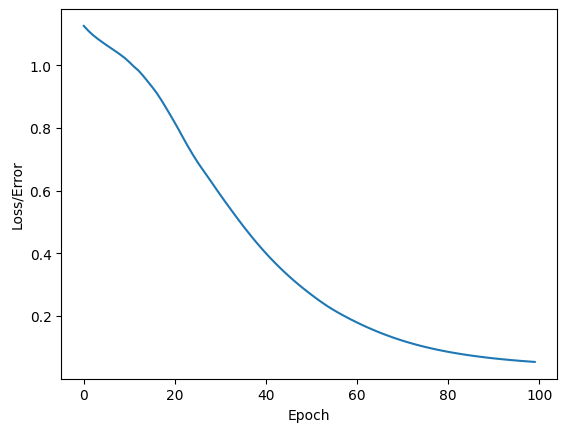

In [21]:
plt.plot(losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.show()

In [22]:
# Evaluate model on Test Dataset
with torch.no_grad():  # this turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.1315)

In [23]:
sum_correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {y_val} \t {y_test[i]} \t {y_val.argmax().item()}') # the highest number in the output is the network prediction
    if y_val.argmax().item() == y_test[i]:
      sum_correct += 1
print(f'\n{sum_correct} flowers were predicted correctly')


1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [24]:
# Testing unseen datasets
iris_new1 = torch.tensor([5.0, 3.3, 1.5, 0.2])
iris_new2 = torch.tensor([5.8, 3.0, 4.56, 1.4])
iris_new3 = torch.tensor([6.3, 3.2, 5.89, 2.24])
new_eval = torch.stack((iris_new1, iris_new2, iris_new3), dim = 0)

In [25]:
labels_new = torch.LongTensor([0, 1, 2])

In [26]:
new_eval[0]

tensor([5.0000, 3.3000, 1.5000, 0.2000])

In [28]:
df['species'].unique()

array([0., 1., 2.])

In [32]:
#df['species']

In [33]:
#df1[df1['species'] == 'virginica'].head()

In [34]:
with torch.no_grad():
  pred = model.forward(new_eval)
  eval = criterion(pred, labels_new)

In [35]:
prediction =[i.argmax().item() for i in pred]

In [36]:
prediction

[0, 1, 2]

In [37]:
eval

tensor(0.0284)

In [38]:
# Saving trained model in pytorch
torch.save(model.state_dict(), 'trained_iris_model.pt')

In [39]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('trained_iris_model.pt'))

<All keys matched successfully>

In [40]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [41]:
with torch.no_grad():
  print(new_model(iris_new1))

tensor([ 4.4432, -2.1397, -2.8322])


# Deep learning algorithm using MNIST datasets -- digit classification

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import pair_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
# Training Data
train_data = datasets.MNIST(root = '/mnist_data', train = True, download = True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19013627.49it/s]


Extracting /mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 597095.23it/s]


Extracting /mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5254989.05it/s]


Extracting /mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2652907.50it/s]

Extracting /mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /mnist_data/MNIST/raw



In [180]:
# Test data
test_data = datasets.MNIST(root = '/mnist_data', train = False, download = True, transform = transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
#pwd # directory we are in

In [8]:
#ls # list directory

In [9]:
#cd ../

In [10]:
#pwd

In [11]:
#ls

In [12]:
#cd mnist_data

In [13]:
#ls

In [14]:
#cd ../

In [15]:
#cd content/

In [16]:
#pwd

In [17]:
# Create small batches using dataloader
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [93]:
# Define the CNN model
# Describe convolutional layer and what it's doing
conv1 = nn.Conv2d(1, 6, 3, 1)   # (input_size, convolution filters, kerner_size, stride, padding)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [75]:
# Check 1 of the MNIST image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [94]:
X_train.shape

torch.Size([1, 28, 28])

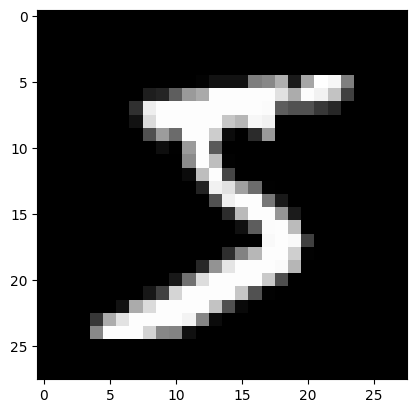

In [95]:
X_train_numpy = X_train.detach().numpy()
i_ = X_train_numpy.squeeze(0)
plt.imshow(i_, cmap = 'gray')
plt.show()

In [96]:
# extend the dimension of the the train data
x = X_train.view(1, 1, 28, 28)
x.shape

torch.Size([1, 1, 28, 28])

In [97]:
x = F.relu(conv1(x))

In [98]:
x.shape  # 26x26 image shape is coming because we didn't set the parding, the outer spaces are being drop off

torch.Size([1, 6, 26, 26])

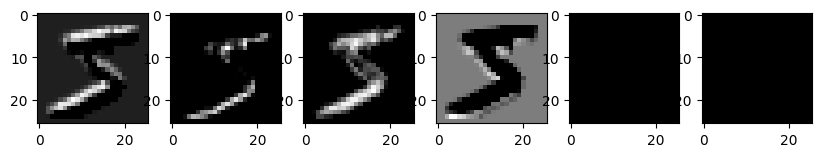

In [99]:
image = x.view(6, 26, 26)
image_numpy = image.detach().numpy()
fig, axs = plt.subplots(1, 6, figsize = (10, 4))
for i in range(6):
  axs[i].imshow(image_numpy[i], cmap = 'gray')
plt.show()

In [100]:
# Set up the pooling layer
x = F.max_pool2d(x, 2, 2)  # kernel size of 2 and stride of 2

In [101]:
x.shape

torch.Size([1, 6, 13, 13])

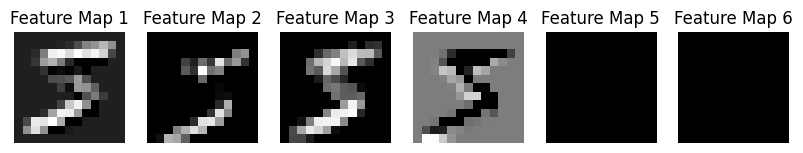

In [102]:
image = x.view(6, 13, 13)
image_numpy = image.detach().numpy()
fig, axs = plt.subplots(1, 6, figsize = (10, 4))
for i in range(6):
  axs[i].imshow(image_numpy[i], cmap = 'gray')
  axs[i].set_title(f'Feature Map {1+i}')
  axs[i].axis('off')
plt.show()

In [103]:
# Second covolution layer
x = F.relu(conv2(x))
x.shape  # No padding results to losing two pixels

torch.Size([1, 16, 11, 11])

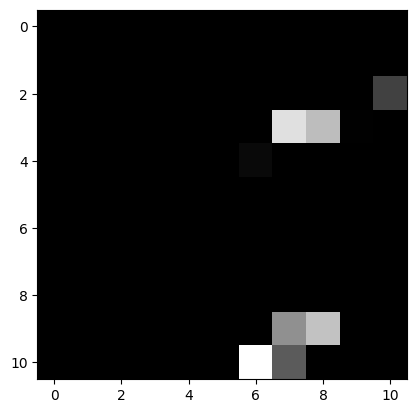

In [104]:
image = x.view(16, 11, 11)
image_numpy = image.detach().numpy()
plt.imshow(image_numpy[1], cmap = 'gray')

In [105]:
x = F.max_pool2d(x, 2, 2)
x.shape  # 11/2, we always round down. We can't round up

torch.Size([1, 16, 5, 5])

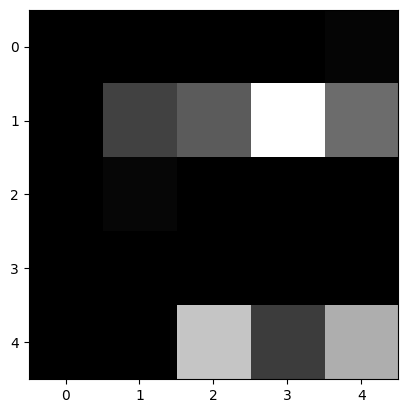

In [106]:
image = x.view(16, 5, 5)
image_numpy = image.detach().numpy()
plt.imshow(image_numpy[8], cmap = 'gray')

In [120]:
# Model Classs
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    # Second convolution
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)

    # reshape to flatten
    x = x.reshape(-1, 16*5*5) # Negative 1 allow us to vary the batch size and (channel output*H_out*W_out)

    # Fully connected layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim = 1)




In [49]:
16*(28//4)*(28//4), 5*5*16 #--> without padding right and with padding left

(784, 400)

In [152]:
# Create instance of the model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [153]:
# loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [117]:
tensor1 = torch.randn(3, 4)
tensor1

tensor([[-1.5482, -0.2769,  2.0895,  0.7095],
        [-0.2768,  1.2086, -1.4376,  1.4859],
        [-0.9018, -0.1651,  1.4594,  0.2246]])

In [109]:
torch.max(tensor1.data)

tensor(1.0607)

In [111]:
torch.max(tensor1.data,1)

torch.return_types.max(
values=tensor([0.9448, 1.0607, 0.9829]),
indices=tensor([2, 1, 1]))

In [112]:
torch.max(tensor1.data,1)[1]

tensor([2, 1, 1])

In [154]:
import time

start_time = time.time()
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# write epochs for loop

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # train now
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1  # start the batches at 1
    y_pred = model(X_train)  # get 2D predicted set from the training set. The result is not flattened
    loss = criterion(y_pred, y_train) #

    predicted = torch.max(y_pred.data, 1)[1]  # Extract predicted class labels from the model output and pick the indices of the prediction
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr # sum up the number of correct prediction in each batches

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print out some paramters
    if b%600 == 0:
      print(f'Epoch: {i+1} Batch: {b} Loss: {loss.item()}' )
  train_losses.append(loss)
  train_correct.append(trn_corr)


  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predict_y = torch.max(y_val.data, 1)[1]
      tst_corr += (predict_y == y_test).sum()

      loss_test = criterion(y_val, y_test)
    test_losses.append(loss_test)
    test_correct.append(tst_corr)


end_time = time.time()
time_used = end_time - start_time
print(f'Model used {time_used/60} minutes to process')

Epoch: 1 Batch: 600 Loss: 0.1623610556125641
Epoch: 1 Batch: 1200 Loss: 0.1502392590045929
Epoch: 1 Batch: 1800 Loss: 0.4744560718536377
Epoch: 1 Batch: 2400 Loss: 0.14238706231117249
Epoch: 1 Batch: 3000 Loss: 0.007758188061416149
Epoch: 1 Batch: 3600 Loss: 0.3836284875869751
Epoch: 1 Batch: 4200 Loss: 0.0038223876617848873
Epoch: 1 Batch: 4800 Loss: 0.0021286322735249996
Epoch: 1 Batch: 5400 Loss: 0.0569545142352581
Epoch: 1 Batch: 6000 Loss: 0.00038789428072050214
Epoch: 2 Batch: 600 Loss: 0.005851339548826218
Epoch: 2 Batch: 1200 Loss: 0.3855525553226471
Epoch: 2 Batch: 1800 Loss: 0.004819948226213455
Epoch: 2 Batch: 2400 Loss: 0.003216963727027178
Epoch: 2 Batch: 3000 Loss: 0.0332382395863533
Epoch: 2 Batch: 3600 Loss: 0.5372857451438904
Epoch: 2 Batch: 4200 Loss: 0.04561494290828705
Epoch: 2 Batch: 4800 Loss: 0.0007510822033509612
Epoch: 2 Batch: 5400 Loss: 0.0001173773780465126
Epoch: 2 Batch: 6000 Loss: 0.14201366901397705
Epoch: 3 Batch: 600 Loss: 0.023733172565698624
Epoch: 3

In [156]:
train_losses = [t.item() for t in train_losses]

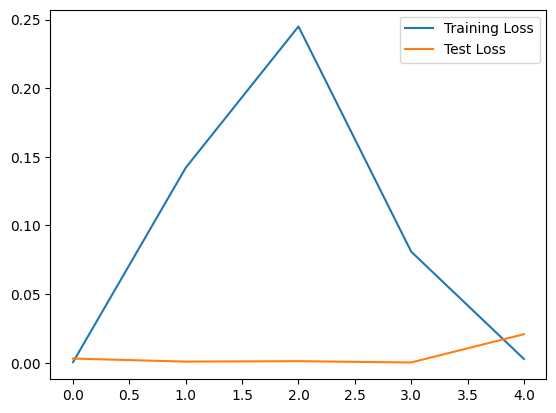

In [157]:
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()


In [158]:
test_losses

[tensor(0.0030),
 tensor(0.0008),
 tensor(0.0011),
 tensor(0.0002),
 tensor(0.0208)]

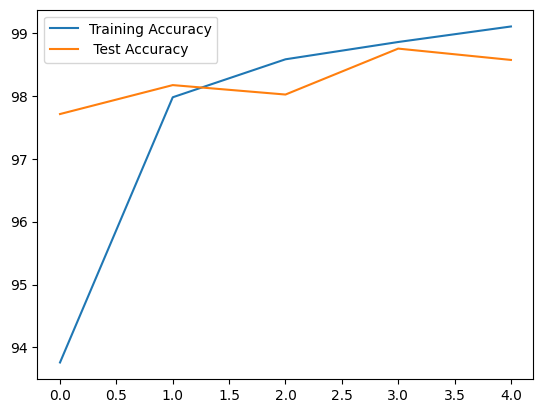

In [171]:
plt.plot([(i.item()/60000)*100 for i in train_correct], label = 'Training Accuracy')
plt.plot([(i.item()/10000)*100 for i in test_correct], label = ' Test Accuracy')
plt.legend()

In [172]:
# Test all the test dataset
test_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [173]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_all:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()


In [175]:
correct.item()/10000*100

98.57000000000001

In [177]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [40]:
test_data[4143][0] # grab the data only, neglecting the label

In [181]:
test_data_ = test_data[4143][0].reshape(28, 28)

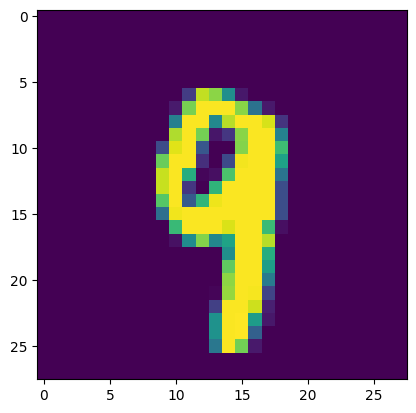

In [182]:
plt.imshow(test_data_)

In [195]:
model.eval()
with torch.no_grad():
  predict_new = model(test_data[4143][0].view(1, 1, 28, 28)) # batch size, color(gray), height, width

In [196]:
predict_new

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])

In [197]:
torch.max(predict_new, 1)

torch.return_types.max(
values=tensor([-0.0002]),
indices=tensor([9]))

In [198]:
torch.max(predict_new, 1)[1]

tensor([9])